In [52]:
data

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,role_department,remote_work
0,51,no,n/a,684,n/a,6,3,n/a,1620,1,male,51,3,5,research director,3,n/a,19537,6462,7,no,13,3,0,11,5,3,20,15,15,1972,n/a,yes
1,52,no,n/a,699,n/a,1,4,life sciences,2590,3,male,65,2,5,manager,3,n/a,19999,5678,0,n/a,14,1,1,34,5,3,33,11,9,1971,n/a,yes
2,42,no,travel_rarely,532,research & development,4,2,technical degree,3190,3,male,58,3,5,manager,4,married,19232,4933,1,no,11,4,0,22,3,2,22,11,15,1981,manager - research & development,yes
3,47,no,travel_rarely,359,n/a,2,4,medical,20681,1,female,82,3,4,research director,3,married,17169,26703,3,n/a,19,2,2,11,2,2,20,5,6,1976,n/a,no
4,46,no,n/a,1319,n/a,3,3,technical degree,20682,1,female,45,4,4,sales executive,1,divorced,6477,7739,2,no,12,4,1,11,5,3,19,2,8,1977,n/a,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,530,n/a,3,1,life sciences,21315,3,male,51,2,3,sales executive,4,married,10325,5518,1,n/a,11,1,1,11,6,3,16,3,7,1987,n/a,no
1610,45,no,non_travel,805,n/a,4,2,n/a,21316,3,male,57,3,2,laboratory technician,2,n/a,4447,23163,1,n/a,12,2,0,11,5,2,9,0,8,1978,n/a,yes
1611,39,no,travel_rarely,903,n/a,13,5,n/a,21317,13,male,41,4,3,sales executive,3,single,6477,2560,0,no,18,4,0,9,3,3,8,0,7,1984,n/a,yes
1612,36,no,non_travel,1229,n/a,8,4,technical degree,21318,1,male,84,3,2,sales executive,4,divorced,6477,25952,4,no,13,4,2,12,3,3,7,0,7,1987,n/a,yes


In [ ]:
url = "https://raw.githubusercontent.com/Violainedlst/proyecto-da-promo-H-modulo-3-team-2-People-pulse/main/CSVs/HR_RAW_DATA_LIMPIO.csv"
data = pd.read_csv(url)

# Para ver el fichero entero
pd.set_option('display.max_columns', None)

In [ ]:
data

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

primero, no sé si me interesa tener una visión global de la empresa en graficas, pero por si acaso pongo algo simple y visual

/tmp/ipykernel_14872/708911872.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='gender', y='monthly_income', palette=['lightgreen', 'lightblue'], ax=axs[1, 0])
/tmp/ipykernel_14872/708911872.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(['Hombre', 'Mujer'])


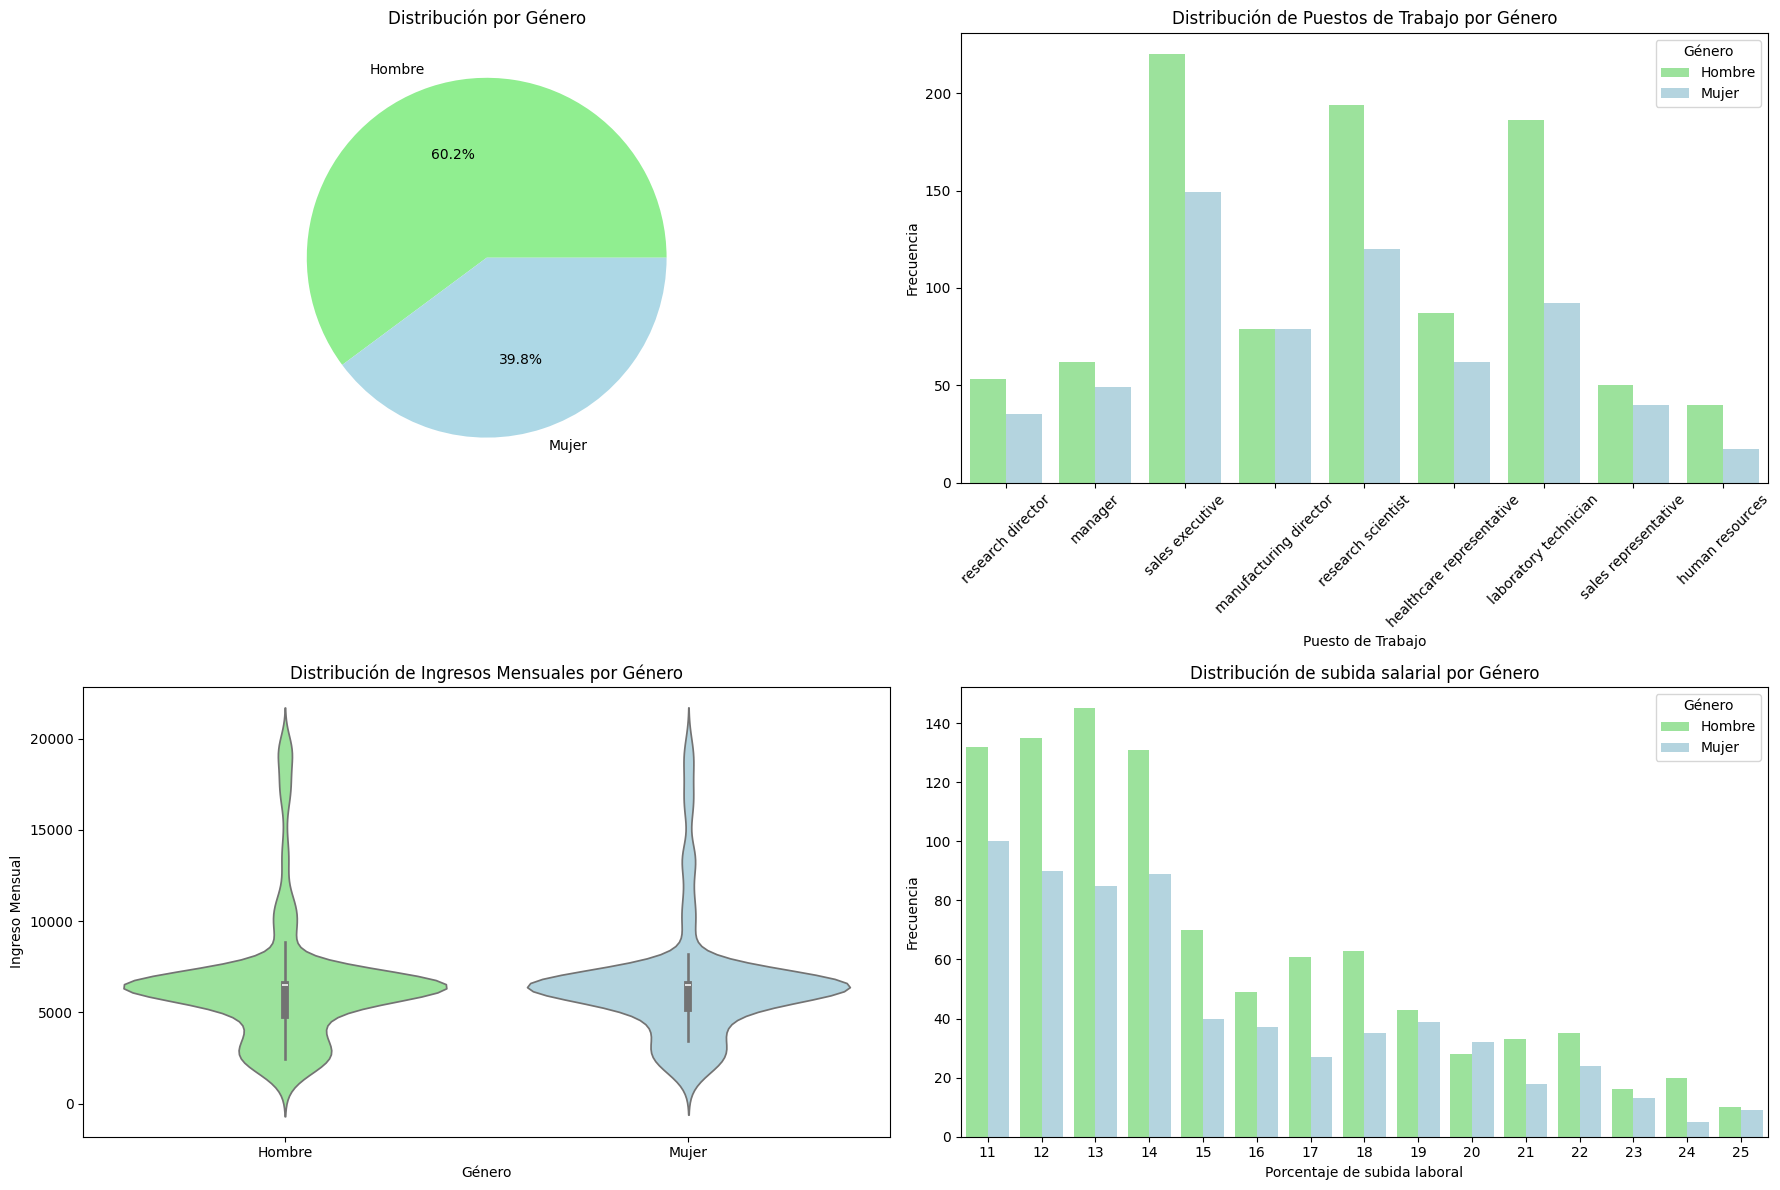

In [83]:
#diferencias entre hombre y mujeres - vemos que hay bastante mas hombres que mujeres en la empresa.
#seria interesante buscar el nivel de manager de mujeres ? y ver, dentro de los que se han ido, cual es el porcentaje de mujeres y cual era su job level. 
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# 1. Distribución de género: Gráfico de pastel de la variable Gender
gender_counts = data['gender'].value_counts()
axs[0,0].pie(gender_counts, labels=['Hombre', 'Mujer'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
axs[0,0].set_title('Distribución por Género')

# 2. Distribución de puestos de trabajo por género: Gráfico de barras apiladas
sns.countplot(data=data, x='job_role', hue='gender', palette=['lightgreen', 'lightblue'], ax=axs[0,1])
axs[0,1].set_title('Distribución de Puestos de Trabajo por Género')
axs[0,1].set_xlabel('Puesto de Trabajo')
axs[0,1].set_ylabel('Frecuencia')
axs[0,1].legend(title='Género', labels=['Hombre', 'Mujer'])
axs[0, 1].tick_params(axis='x', rotation=45)

#3. Distrubución de ingresos mensuales poor genero
sns.violinplot(data=data, x='gender', y='monthly_income', palette=['lightgreen', 'lightblue'], ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Ingresos Mensuales por Género')
axs[1, 0].set_xlabel('Género')
axs[1, 0].set_ylabel('Ingreso Mensual')
axs[1, 0].set_xticklabels(['Hombre', 'Mujer'])

#4 horas extras por genero
sns.countplot(data=data, x='percent_salary_hike', hue='gender', palette=['lightgreen', 'lightblue'], ax=axs[1, 1])
axs[1, 1].set_title('Distribución de subida salarial por Género')
axs[1, 1].set_xlabel('Porcentaje de subida laboral')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].legend(title='Género', labels=['Hombre', 'Mujer'])

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

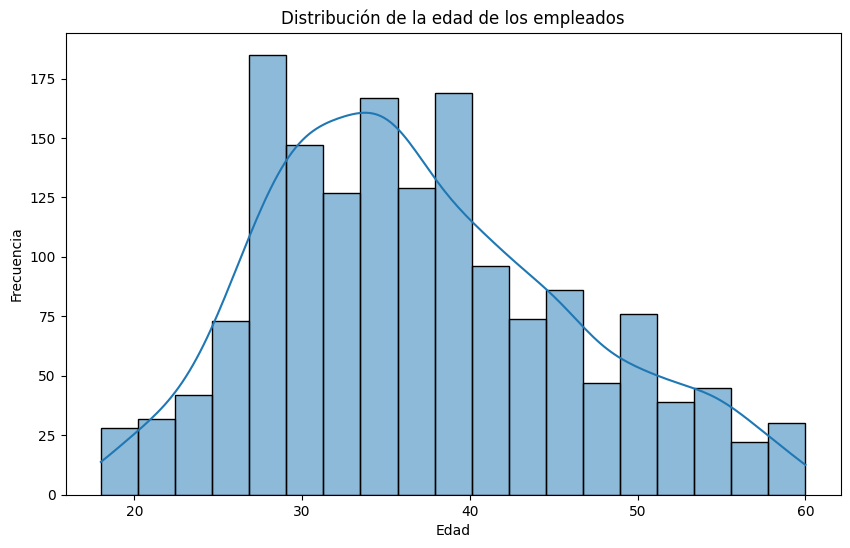

In [55]:
plt.figure(figsize=(10, 6))

sns.histplot(data['age'], 
             kde=True)

plt.title('Distribución de la edad de los empleados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

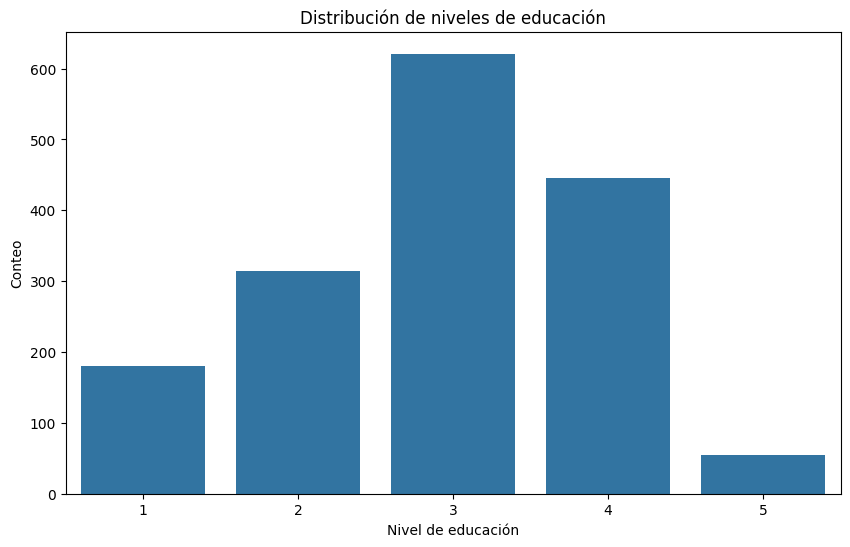

In [56]:
plt.figure(figsize=(10, 6))

sns.countplot(x='education', 
              data=data)

plt.title('Distribución de niveles de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Conteo')
plt.show()

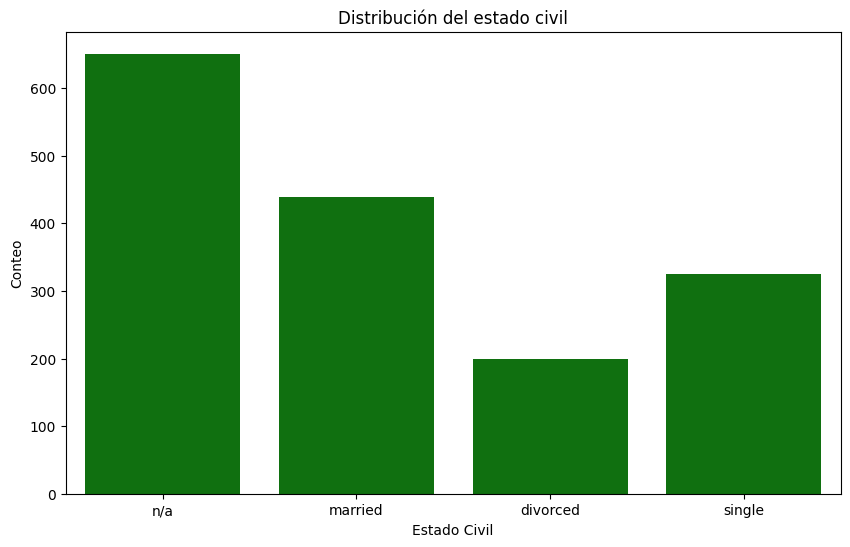

In [57]:
plt.figure(figsize=(10, 6))

sns.countplot(x='marital_status', 
              data=data,
              color="green")

plt.title('Distribución del estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')
plt.show()

#

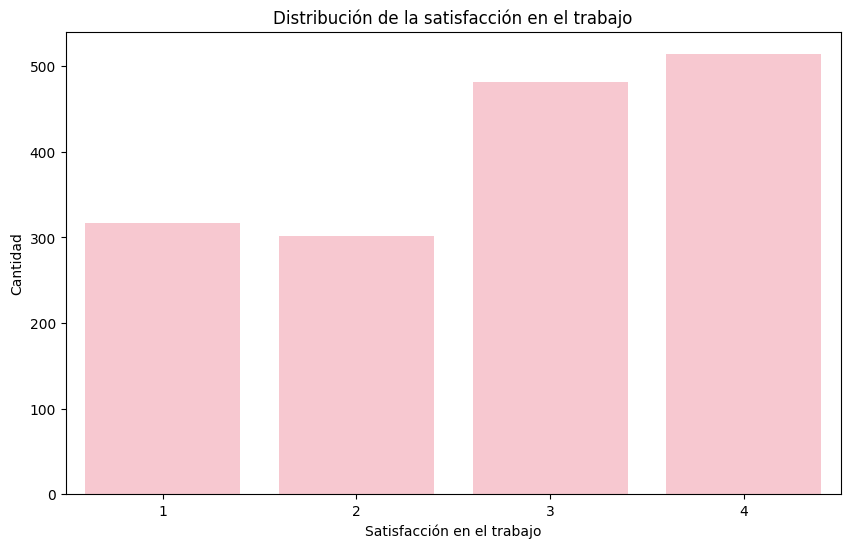

In [84]:
plt.figure(figsize=(10, 6))

sns.countplot(x='job_satisfaction', 
              data=data,
              color="pink")

plt.title('Distribución de la satisfacción en el trabajo')
plt.xlabel('Satisfacción en el trabajo')
plt.ylabel('Cantidad')
plt.show()

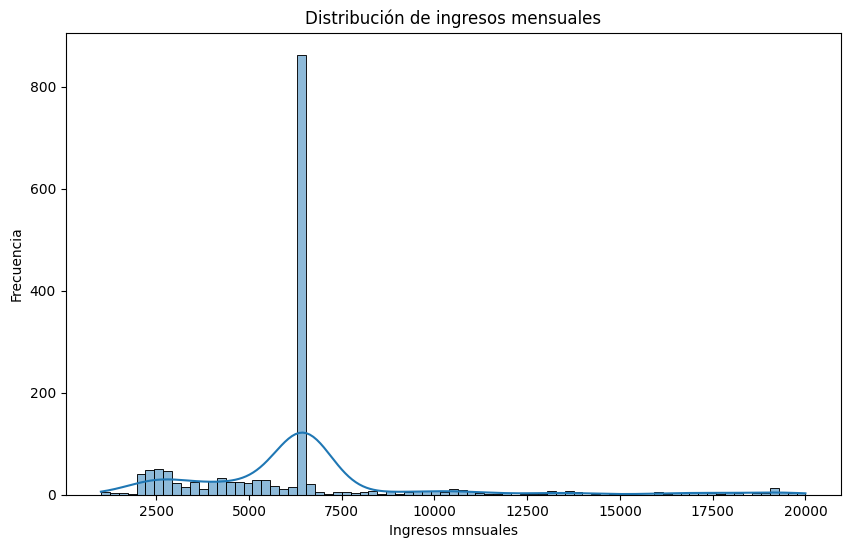

In [59]:
plt.figure(figsize=(10, 6))

sns.histplot(data['monthly_income'], 
             kde=True)

plt.title('Distribución de ingresos mensuales')
plt.xlabel('Ingresos mnsuales')
plt.ylabel('Frecuencia')
plt.show()

#eso es raro no?

Basandonos en el concepto de survivorship bias, vamos a centrarnos en los clientes que siguen en la empresa y estudiar que es lo que les hace felices, para replicarlo a todos. Buscamos patrones de alegria.

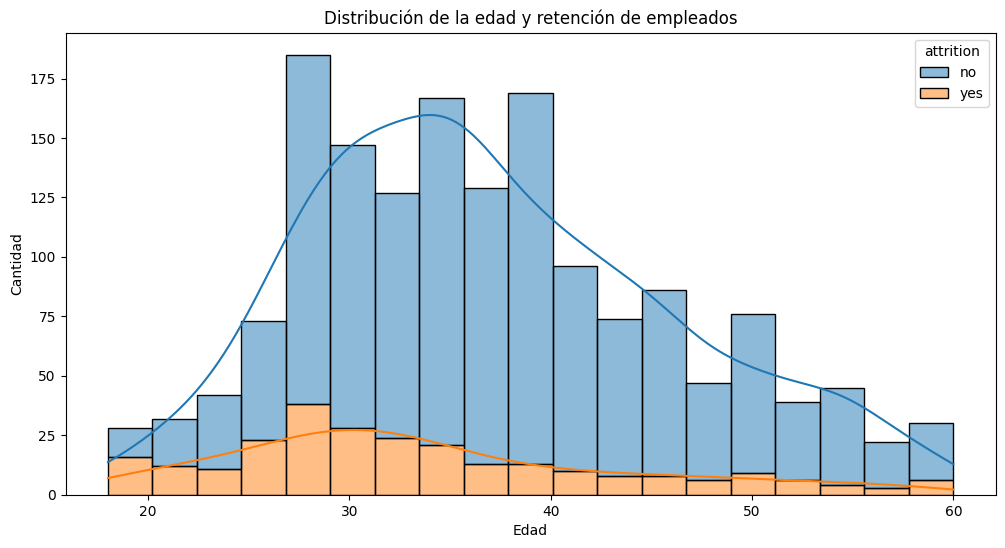

In [97]:
#Estoy buscando una relación entre la edad del empleado y su retención.

plt.figure(figsize=(12, 6))
sns.histplot(data=data, 
             x='age', 
             hue='attrition', 
             multiple='stack', 
             kde=True)

plt.title('Distribución de la edad y retención de empleados')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

In [61]:
#Buscamos si la satisfaccion laboral tiene que ver con la retención de empleados, es decir, un cliente tiene que estar mal para irse? 
#Eso nos levanta otra pregunta, si esta feliz y se ha ido, porque sera? Sueldo bajo? no remote work? distance from home very far? 

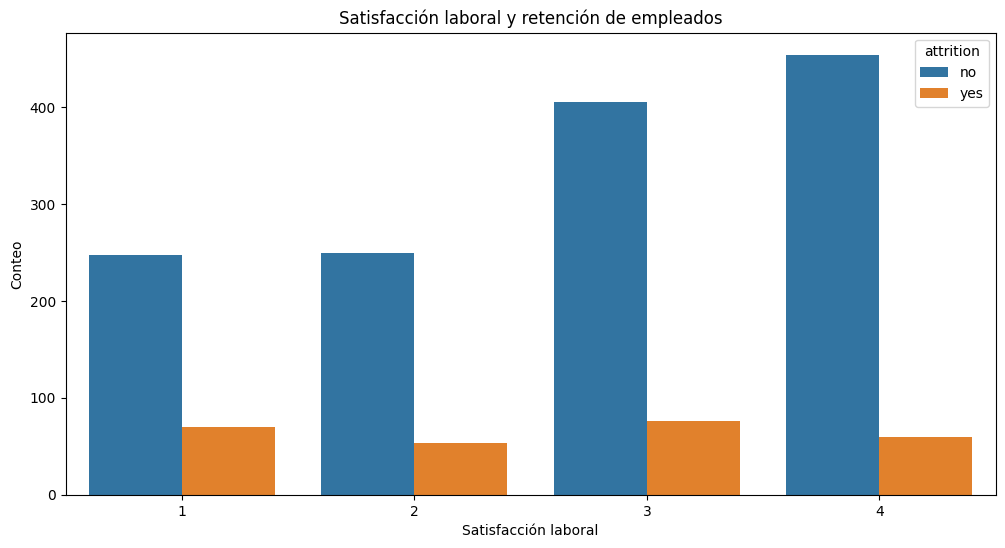

In [68]:
plt.figure(figsize=(12, 6))

sns.countplot(data=data, 
              x='job_satisfaction', 
              hue='attrition')

plt.title('Satisfacción laboral y retención de empleados')
plt.xlabel('Satisfacción laboral')
plt.ylabel('Conteo')
plt.show()

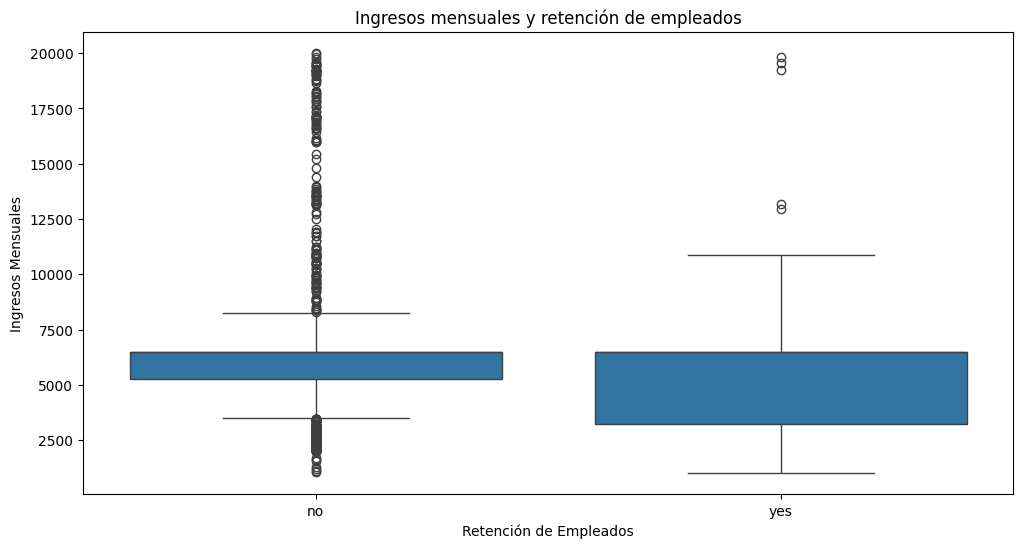

In [63]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data,
            x='attrition',
            y='monthly_income')

plt.title('Ingresos mensuales y retención de empleados')
plt.xlabel('Retención de Empleados')
plt.ylabel('Ingresos Mensuales')
plt.show()

/tmp/ipykernel_14872/3468455916.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Baja', 'Media', 'Alta', 'Muy Alta'])
/tmp/ipykernel_14872/3468455916.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Baja', 'Media', 'Alta', 'Muy Alta'])
/tmp/ipykernel_14872/3468455916.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Malo', 'Bueno', 'Mejor', 'Óptimo'])
/tmp/ipykernel_14872/3468455916.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['No', 'Sí'])


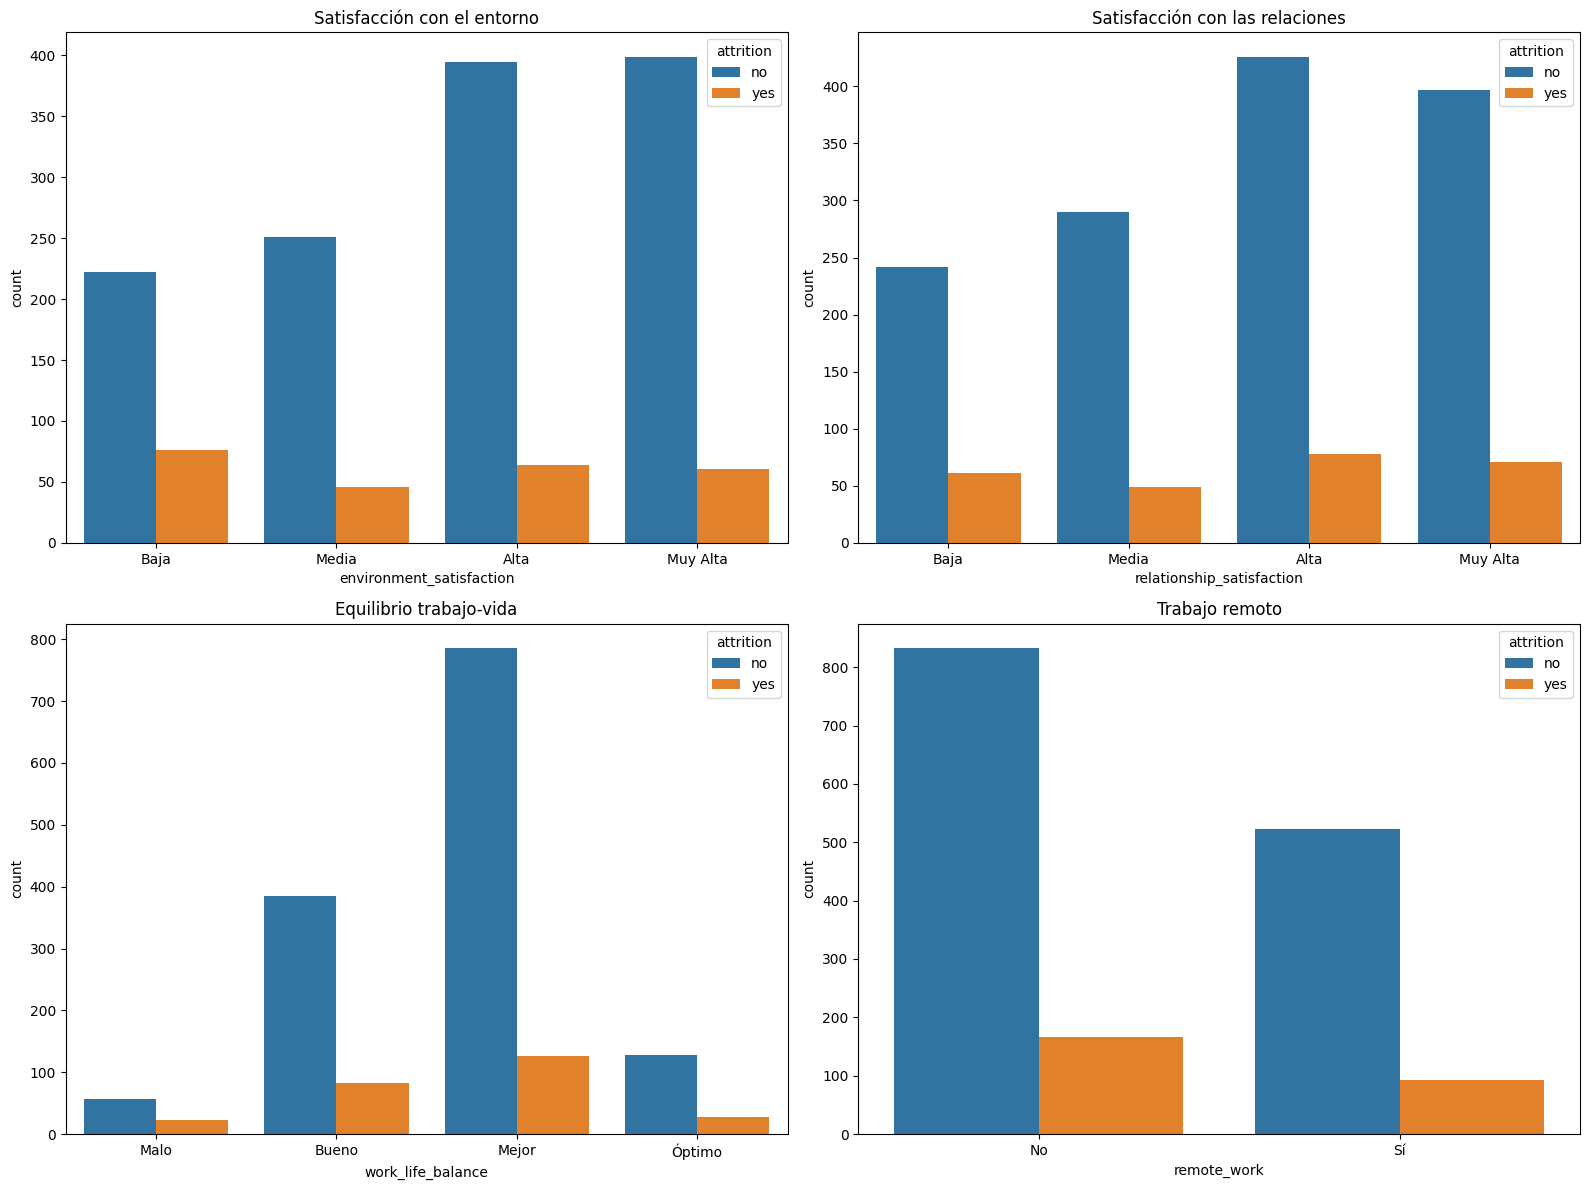

In [114]:
data_filtered = data[data['environment_satisfaction'].between(1, 4)]

# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# Gráfico 1: Satisfacción con el entorno (filtrado)
sns.countplot(data=data_filtered, x='environment_satisfaction', hue='attrition', ax=axes[0, 0])
axes[0, 0].set_title('Satisfacción con el entorno')
axes[0, 0].set_xticklabels(['Baja', 'Media', 'Alta', 'Muy Alta'])

# Gráfico 2: Satisfacción con las relaciones
sns.countplot(data=data, x='relationship_satisfaction', hue='attrition', ax=axes[0, 1])
axes[0, 1].set_title('Satisfacción con las relaciones')
axes[0, 1].set_xticklabels(['Baja', 'Media', 'Alta', 'Muy Alta'])

# Gráfico 3: Equilibrio trabajo-vida
sns.countplot(data=data, x='work_life_balance', hue='attrition', ax=axes[1, 0])
axes[1, 0].set_title('Equilibrio trabajo-vida')
axes[1, 0].set_xticklabels(['Malo', 'Bueno', 'Mejor', 'Óptimo'])

# Gráfico 4: Trabajo remoto
sns.countplot(data=data, x='remote_work', hue='attrition', ax=axes[1, 1])
axes[1, 1].set_title('Trabajo remoto')
axes[1, 1].set_xticklabels(['No', 'Sí'])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

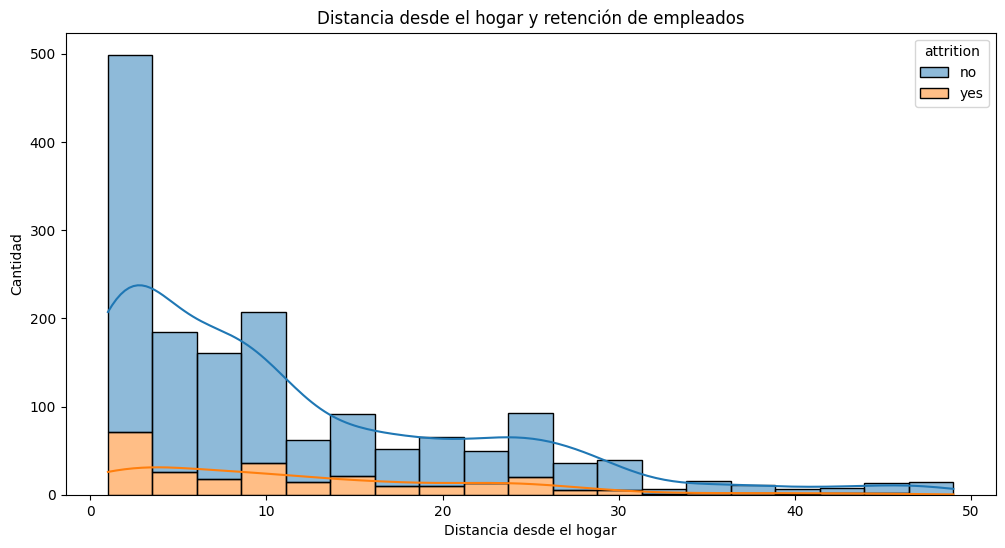

In [115]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data,
            x='distance_from_home',
            hue='attrition',
            multiple='stack', 
            kde=True)

plt.title('Distancia desde el hogar y retención de empleados')
plt.xlabel('Distancia desde el hogar')
plt.ylabel('Cantidad')
plt.show()

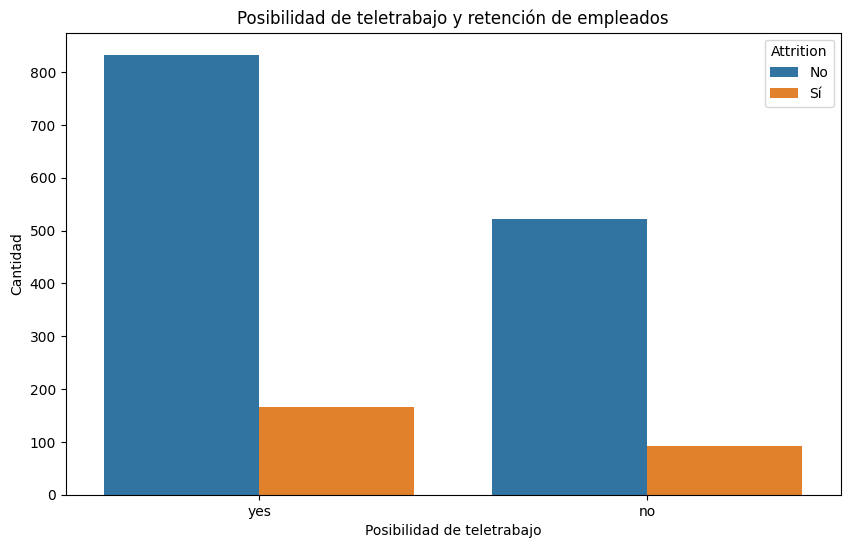

In [117]:
#grafica de remote_work 

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='remote_work', hue='attrition')

plt.title('Posibilidad de teletrabajo y retención de empleados')
plt.xlabel('Posibilidad de teletrabajo')
plt.ylabel('Cantidad')
plt.legend(title='Attrition', labels=['No', 'Sí'])

plt.show()

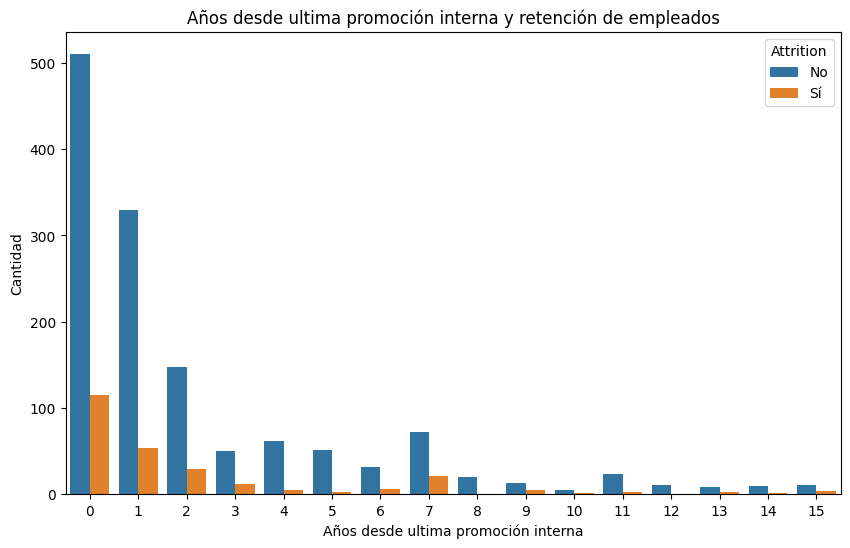

In [119]:
#grafica de subida salarial 



plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='years_since_last_promotion', hue='attrition')

plt.title('Años desde ultima promoción interna y retención de empleados')
plt.xlabel('Años desde ultima promoción interna')
plt.ylabel('Cantidad')
plt.legend(title='Attrition', labels=['No', 'Sí'])

plt.show()